In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
Org_path = "../Original_data/"
Analysis = "../Analysis/"

Wielko_ = pd.read_csv(f"{Org_path}Wielkopolskie.csv",delimiter=',')
Wielko = Wielko_[['Dni od zakupu','Marka','Wiek kupującego', 'Płeć kupującego', 'Ocena']]
Wielko.to_csv(f'{Analysis}Wielkopolska_ratings.csv',sep = ';',index=None)

Średnia ocena marki:

In [4]:
avg_rating = pd.pivot_table(Wielko, values='Ocena', index=None, columns='Marka', aggfunc='mean')
avg_rating.to_csv(f'{Analysis}Rating_for_brand.csv',sep = ';',index=False)



 Ocena marka w zależności od dnia po zakupie

Marka              Beko     Dyson  Electrolux  Samsung     Tefal
Dni od zakupu                                                   
0                   NaN  3.500000         NaN      NaN       NaN
1                   NaN  1.000000         NaN      NaN       NaN
2              2.875000  2.333333    3.750000    1.500  3.500000
3              2.333333  2.388889    2.772727    2.000  2.800000
4              3.250000  2.250000    2.500000    1.500  2.125000
5              2.269231  2.666667    2.685185    2.750  3.071429
6              2.676471  2.100000    2.400000    2.500  1.875000
7              2.541667  2.700000    2.576923    2.375  2.450000
8              2.425000  2.464286    2.552632    2.250  2.944444
9              2.000000  2.357143    2.687500    1.750  2.700000
10             2.500000  2.250000    2.562500    2.500  1.625000
11             2.937500  2.200000    2.625000    1.250  2.666667
12             2.750000  2.500000    2.437500    2.250  3.375000
13             2.250000  

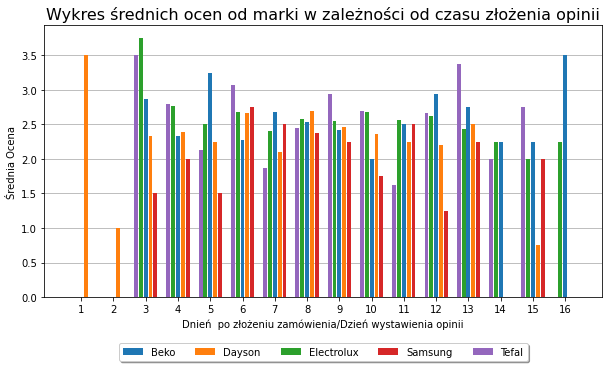

In [10]:
Days = pd.pivot_table(Wielko, values='Ocena',index='Dni od zakupu',  columns='Marka', aggfunc='mean')
Days.to_csv(f'{Analysis}Rating_changes_per_day.csv',sep = ';',index=False)

 Ocena marki w zależności od płci

In [13]:
Sex = pd.pivot_table(Wielko, values='Ocena',index='Płeć kupującego',  columns='Marka', aggfunc='mean')
Sex.to_csv(f'{Analysis}Mark_rating_to_sex.csv',sep = ';',index=False)

Rozkład wieku kupujących

Text(0.5, 1.0, 'Wykres ilości recenzentów od wieku')

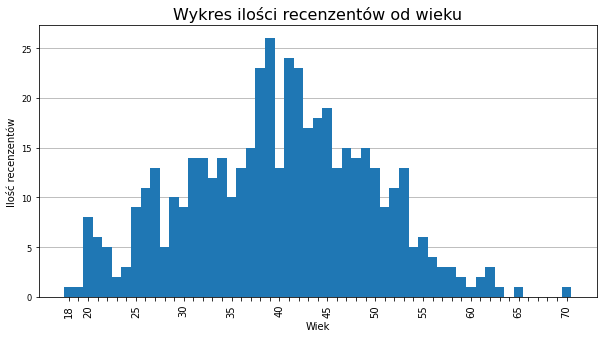

In [15]:
# import numpy as np
Age = pd.pivot_table(Wielko, values='Ocena',  columns='Wiek kupującego', aggfunc='count')
Age.to_csv(f'{Analysis}Buyers_age_histogram.csv',sep = ';',index=False)

Age_list = Age.values.tolist()
d = 0
Hist_data = [[],[]]
j = 0
for i in range(int(Age.columns.values[0]), int(Age.columns.values[-1])+1):
    if i in Age.columns.values:
        if i == 18 or i %5 == 0:
            Hist_data[0].append(int(Age.columns.values[j-d]))
            Hist_data[1].append(Age_list[0][j-d])
        else:
            Hist_data[0].append('')
            Hist_data[1].append(Age_list[0][j-d])
    else:
        d+= 1
        if i == 18 or i %5 == 0:
            Hist_data[0].append(j+int(Age.columns.values[0]))
            Hist_data[1].append(0)
        else:
            Hist_data[0].append('')
            Hist_data[1].append(0)
    j += 1



width = 1
plt.figure(figsize=(10,5))
plt.rcParams['ytick.labelsize'] = 'small'
bars = Hist_data[0]
bins = np.arange(len(Hist_data[0]))
plt.rc('axes', axisbelow=True)
plt.bar(bins, Hist_data[1], width, label='Mężczyźni')
plt.xticks(bins ,bars, rotation =90)
plt.grid(axis = 'y' )
plt.xlabel('Wiek')
plt.ylabel('Ilość recenzentów')
plt.title('Wykres ilości recenzentów od wieku', fontsize=16)



